<a href="https://colab.research.google.com/github/thayportellads/Fraud_Detection/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_Credit_Card_Modelos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Modelos de Machine Learning para detectar Fraude de Cartões - Script do Projeto

**Descrição de Dados:**
*   10.000 observações com 10 variáveis
*   Variável alvo: is_fraud
*   Distribuição de classes: Altamente desequilibrada (fraude ≈ 4–5%)

---

**🎯 Objetivo**

Construir e avaliar modelos de aprendizado de máquina capazes de identificar transações fraudulentas com cartão de crédito usando características em nível de transação, como valor, horário, discrepância de localização, confiabilidade do dispositivo e velocidade da transação.

In [ ]:
# importar as bibliotecas necessárias
import pandas             as pd     # manipulação de dados
import numpy              as np     # manipulação de arrays
import matplotlib.pyplot  as plt    # visualização de dados
import seaborn            as sns    # visualização estatística dos dados
import warnings                     # notificações
warnings.filterwarnings('ignore')   # configurar notificações para serem ignoradas

In [ ]:
# importar os dados
dfo = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos/credit_card_fraud_10k.csv')
dfo.head(10)

,transaction_id,amount,transaction_hour,merchant_category,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
0,1,84.47,22,Electronics,0,0,66,3,40,0
1,2,541.82,3,Travel,1,0,87,1,64,0
2,3,237.01,17,Grocery,0,0,49,1,61,0
3,4,164.33,4,Grocery,0,1,72,3,34,0
4,5,30.53,15,Food,0,0,79,0,44,0
5,6,30.53,13,Clothing,0,0,90,2,46,0
6,7,10.77,18,Travel,0,0,48,1,28,0
7,8,362.02,13,Electronics,0,0,68,1,40,0
8,9,165.43,8,Grocery,0,0,80,0,21,0
9,10,221.63,5,Grocery,0,0,59,1,34,0


In [ ]:
# verificando as informações da base de dados
dfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transaction_id       10000 non-null  int64  
 1   amount               10000 non-null  float64
 2   transaction_hour     10000 non-null  int64  
 3   merchant_category    10000 non-null  object 
 4   foreign_transaction  10000 non-null  int64  
 5   location_mismatch    10000 non-null  int64  
 6   device_trust_score   10000 non-null  int64  
 7   velocity_last_24h    10000 non-null  int64  
 8   cardholder_age       10000 non-null  int64  
 9   is_fraud             10000 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 781.4+ KB


In [ ]:
#verificando se existem colunas com valores ausentes
dfo.isnull().sum()

,0
transaction_id,0
amount,0
transaction_hour,0
merchant_category,0
foreign_transaction,0
location_mismatch,0
device_trust_score,0
velocity_last_24h,0
cardholder_age,0
is_fraud,0


In [ ]:
#verificando a estatistica dos dados
dfo.describe()

,transaction_id,amount,transaction_hour,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,175.949849,11.593300,0.097800,0.085700,61.798900,2.008900,43.468700,0.015100
std,2886.89568,175.392827,6.922708,0.297059,0.279935,21.487053,1.432559,14.979147,0.121957
min,1.00000,0.000000,0.000000,0.000000,0.000000,25.000000,0.000000,18.000000,0.000000
25%,2500.75000,50.905000,6.000000,0.000000,0.000000,43.000000,1.000000,30.000000,0.000000
50%,5000.50000,122.095000,12.000000,0.000000,0.000000,62.000000,2.000000,44.000000,0.000000
75%,7500.25000,242.480000,18.000000,0.000000,0.000000,80.000000,3.000000,56.000000,0.000000
max,10000.00000,1471.040000,23.000000,1.000000,1.000000,99.000000,9.000000,69.000000,1.000000


,count
is_fraud,
0,9849
1,151


<Figure size 640x480 with 0 Axes>

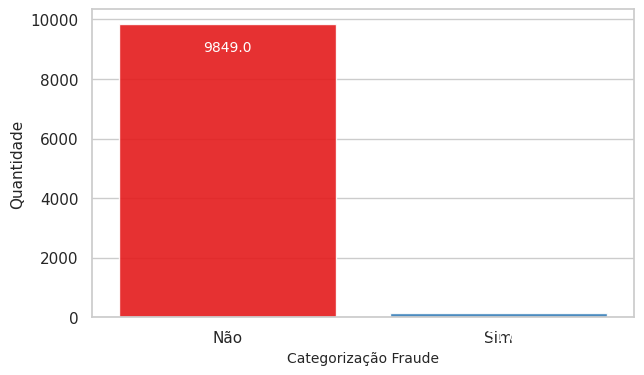

In [ ]:
## Plotar gráfico
# Contar a frequência de categorias na coluna categórica
display(dfo['is_fraud'].value_counts())

plt.figure(facecolor='White')
sns.set(style='whitegrid')
plt.figure(figsize=(7,4), facecolor='White')
ax = sns.countplot(data=dfo, x='is_fraud', saturation=1, alpha=0.9, palette='Set1')
ax.set_xlabel('Fraude', fontsize=10)
ax.set_ylabel('Quantidade', fontsize=10)
ax.set_xticklabels(['Não', 'Sim'])

plt.xlabel('Categorização Fraude', fontsize=10)
plt.ylabel('Quantidade', fontsize=11)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x() + 0.4, p.get_height()), ha='center', va='top', color='white', size=10)

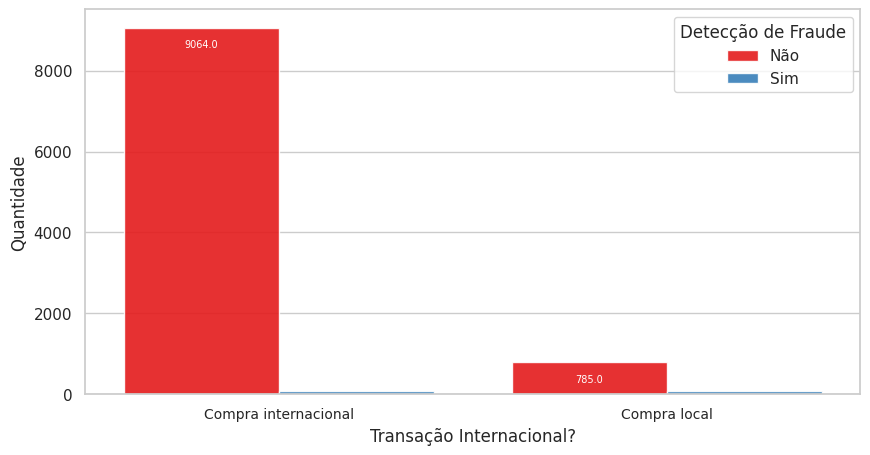

In [ ]:
# Checando a variavel location_mismatch
plt.figure(figsize=(10,5), facecolor='white')
sns.set(style='whitegrid')
ax = sns.countplot(data=dfo, x='location_mismatch', hue='is_fraud', saturation=1, alpha=0.9, palette='Set1')
plt.xlabel('Transação Internacional?')
plt.ylabel('Quantidade')
ax.set_xticklabels(['Compra internacional', 'Compra local'], fontsize=10)

for p in ax.patches:
  ax.legend(['Não', 'Sim'], title='Detecção de Fraude')
  ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=7)
plt.show()

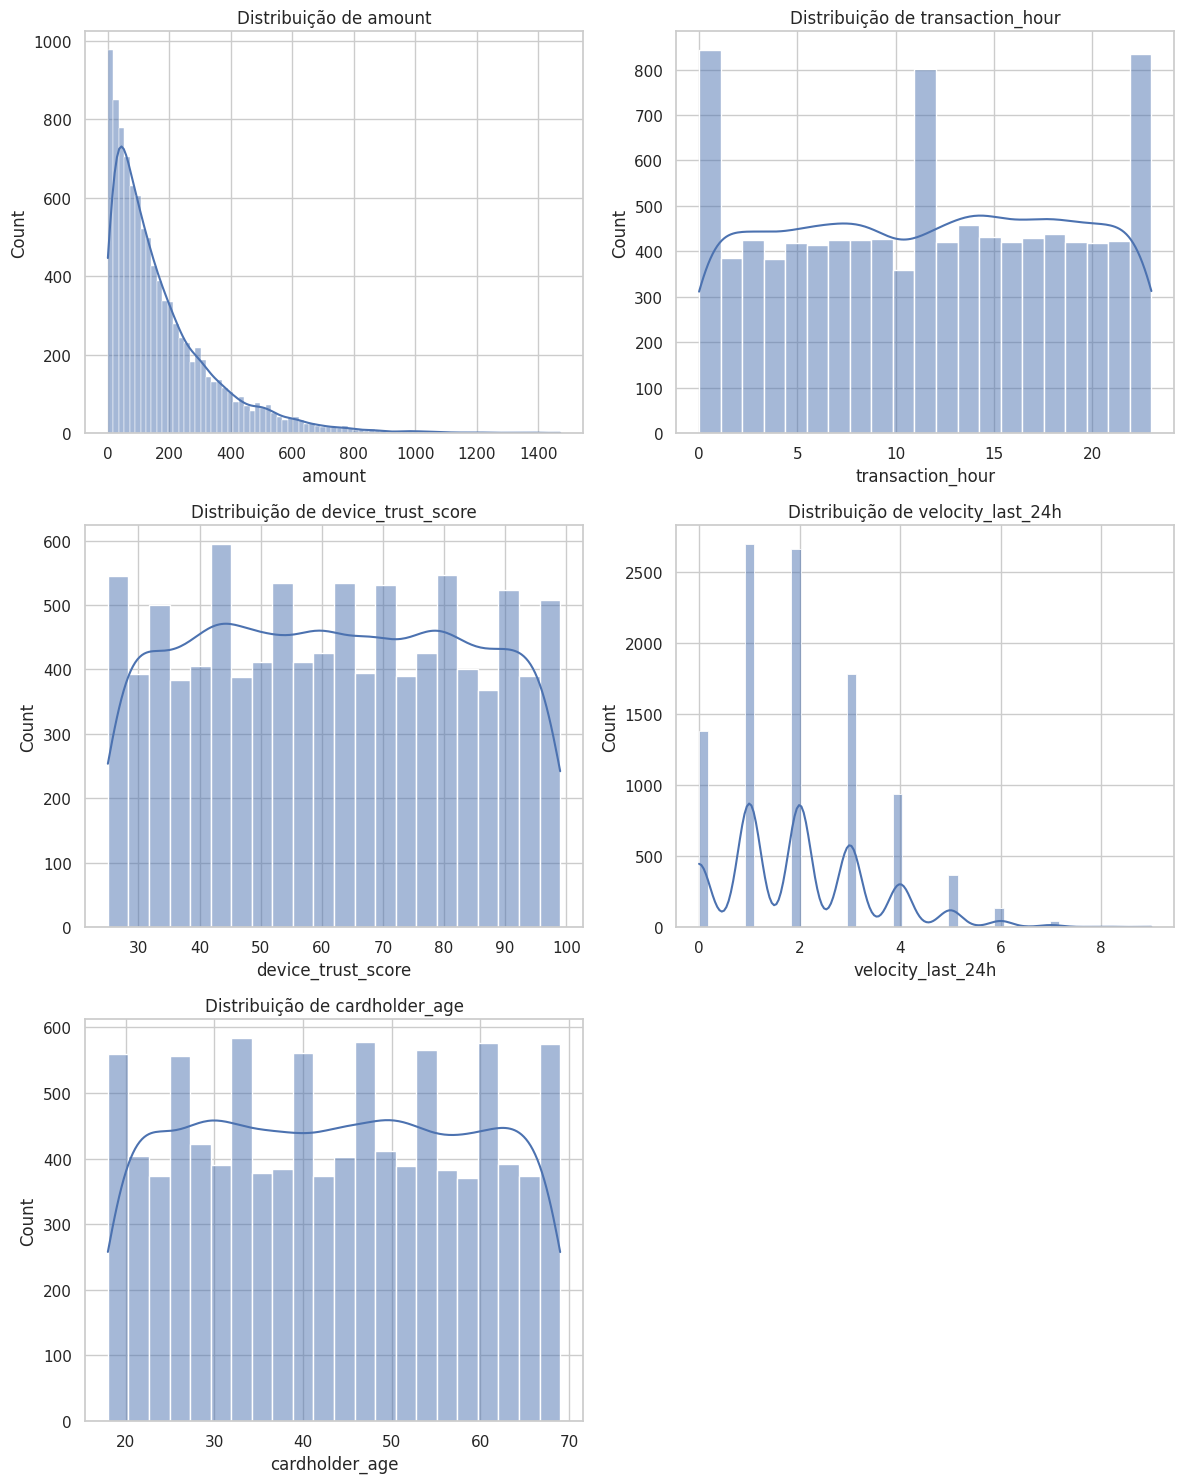

In [ ]:
num_cols = [
    "amount", "transaction_hour", "device_trust_score",
    "velocity_last_24h", "cardholder_age"
]

# Calculate number of rows needed for 2 plots per row
n_cols = 2
n_rows = (len(num_cols) + n_cols - 1) // n_cols # Ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(num_cols):
    sns.histplot(dfo[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribuição de {col}")

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

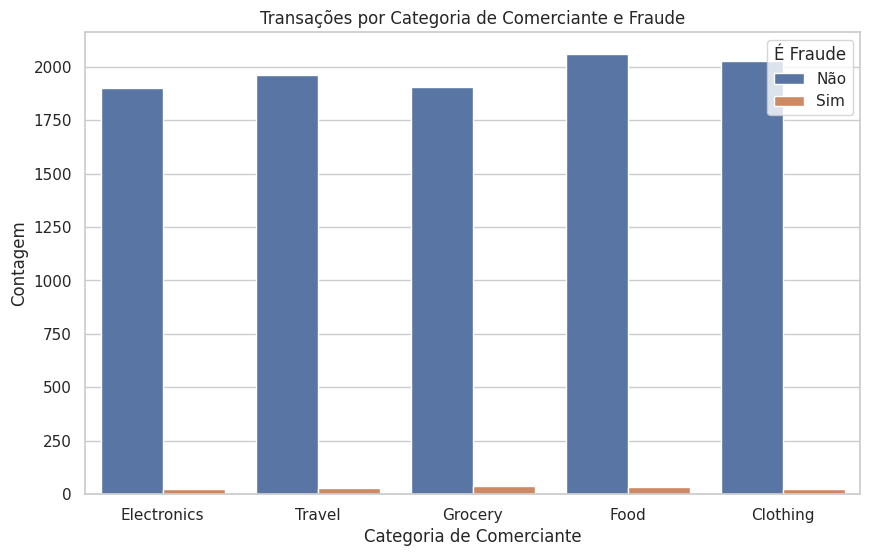

In [ ]:
dfo['is_fraud_txt'] = dfo['is_fraud'].map({1: 'Sim', 0: 'Não'})

plt.figure(figsize=(10, 6))
sns.countplot(data=dfo, x='merchant_category', hue='is_fraud_txt')
plt.title('Transações por Categoria de Comerciante e Fraude')
plt.xlabel('Categoria de Comerciante')
plt.ylabel('Contagem')
plt.legend(title='É Fraude')
plt.show()

In [ ]:
# transformando a variável merchant_category em dummy
df_dummies = pd.get_dummies(dfo, columns=['merchant_category'], drop_first=True)
df_dummies.head()

,transaction_id,amount,transaction_hour,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud,is_fraud_txt,merchant_category_Electronics,merchant_category_Food,merchant_category_Grocery,merchant_category_Travel
0,1,84.47,22,0,0,66,3,40,0,Não,True,False,False,False
1,2,541.82,3,1,0,87,1,64,0,Não,False,False,False,True
2,3,237.01,17,0,0,49,1,61,0,Não,False,False,True,False
3,4,164.33,4,0,1,72,3,34,0,Não,False,False,True,False
4,5,30.53,15,0,0,79,0,44,0,Não,False,True,False,False


In [ ]:
# transformando a variavel hora em label e depois em dummy
def faixa_hora(x):
    if 0 <= x < 6:
        return 'madrugada'
    elif 6 <= x < 12:
        return 'manha'
    elif 12 <= x < 18:
        return 'tarde'
    else:
        return 'noite'

dfo['hora_periodo'] = dfo['transaction_hour'].apply(faixa_hora)

# Criando dummies só do período de hora
hora_dummies = pd.get_dummies(dfo['hora_periodo'], prefix='hora_periodo')

# Juntando com o df_dummies
df_final = pd.concat([df_dummies, hora_dummies], axis=1)

In [ ]:
df_final.head()

,transaction_id,amount,transaction_hour,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud,is_fraud_txt,merchant_category_Electronics,merchant_category_Food,merchant_category_Grocery,merchant_category_Travel,hora_periodo_madrugada,hora_periodo_manha,hora_periodo_noite,hora_periodo_tarde
0,1,84.47,22,0,0,66,3,40,0,Não,True,False,False,False,False,False,True,False
1,2,541.82,3,1,0,87,1,64,0,Não,False,False,False,True,True,False,False,False
2,3,237.01,17,0,0,49,1,61,0,Não,False,False,True,False,False,False,False,True
3,4,164.33,4,0,1,72,3,34,0,Não,False,False,True,False,True,False,False,False
4,5,30.53,15,0,0,79,0,44,0,Não,False,True,False,False,False,False,False,True


In [ ]:
df_model = df_final.drop(columns=['transaction_hour','is_fraud_txt'])
df_model.head()

,transaction_id,amount,foreign_transaction,location_mismatch,device_trust_score,velocity_last_24h,cardholder_age,is_fraud,merchant_category_Electronics,merchant_category_Food,merchant_category_Grocery,merchant_category_Travel,hora_periodo_madrugada,hora_periodo_manha,hora_periodo_noite,hora_periodo_tarde
0,1,84.47,0,0,66,3,40,0,True,False,False,False,False,False,True,False
1,2,541.82,1,0,87,1,64,0,False,False,False,True,True,False,False,False
2,3,237.01,0,0,49,1,61,0,False,False,True,False,False,False,False,True
3,4,164.33,0,1,72,3,34,0,False,False,True,False,True,False,False,False
4,5,30.53,0,0,79,0,44,0,False,True,False,False,False,False,False,True


In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   transaction_id                 10000 non-null  int64  
 1   amount                         10000 non-null  float64
 2   foreign_transaction            10000 non-null  int64  
 3   location_mismatch              10000 non-null  int64  
 4   device_trust_score             10000 non-null  int64  
 5   velocity_last_24h              10000 non-null  int64  
 6   cardholder_age                 10000 non-null  int64  
 7   is_fraud                       10000 non-null  int64  
 8   merchant_category_Electronics  10000 non-null  bool   
 9   merchant_category_Food         10000 non-null  bool   
 10  merchant_category_Grocery      10000 non-null  bool   
 11  merchant_category_Travel       10000 non-null  bool   
 12  hora_periodo_madrugada         10000 non-null  

<Axes: >

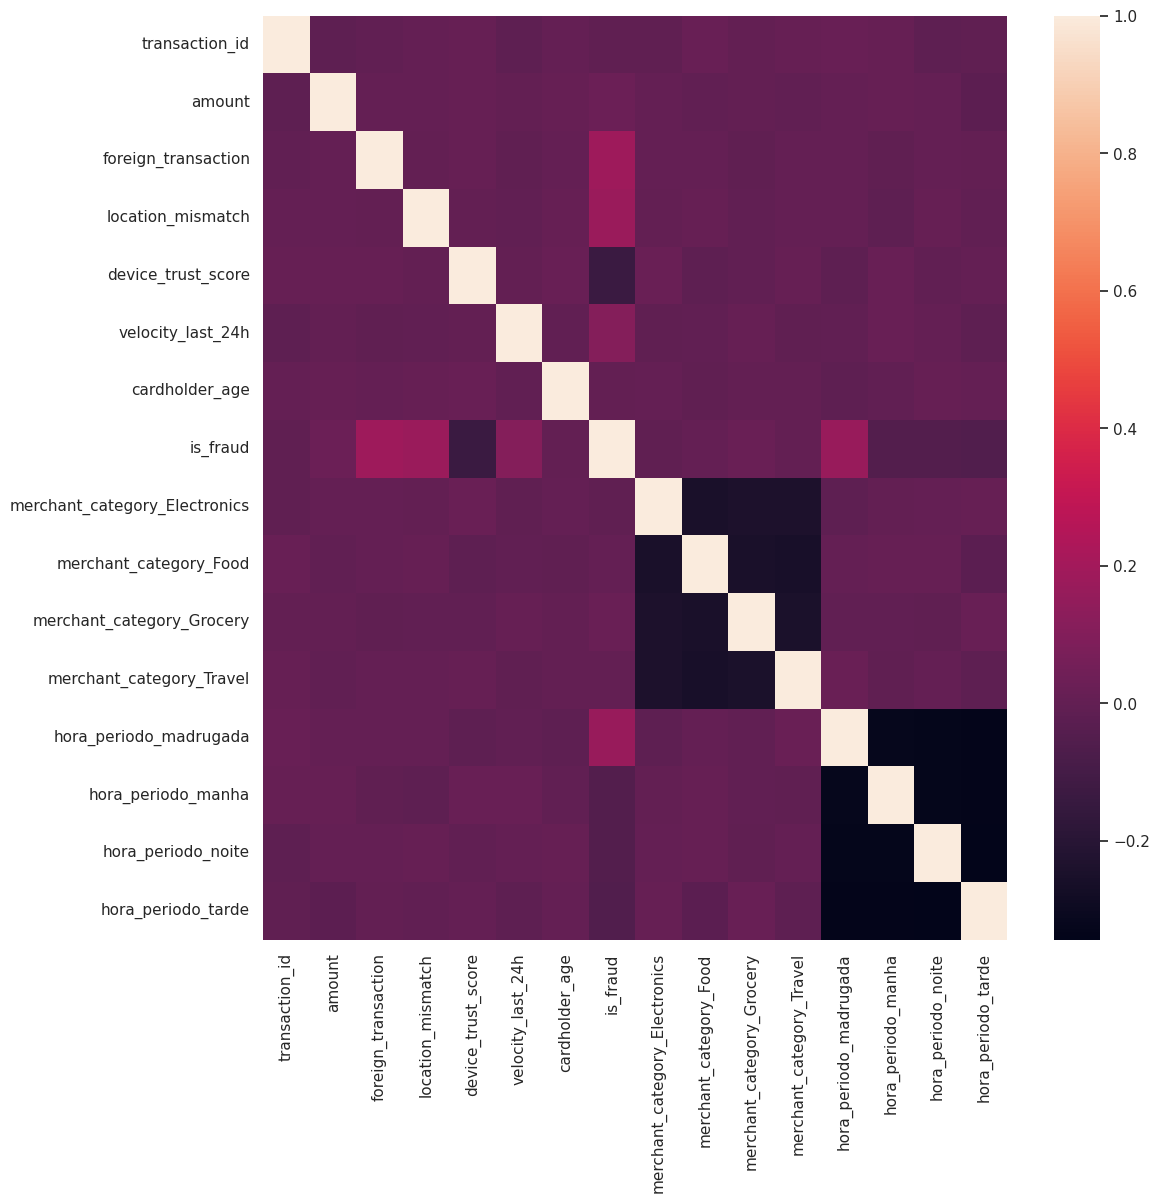

In [ ]:
# Convertendo 'Não' em 0 e 'Sim' em 1 na Base de Dados
for column in df_model.columns:
    df_model[column] = df_model[column].replace({'No': 0, 'Yes': 1})

plt.figure(figsize=(12,12))
sns.heatmap(df_model.corr())

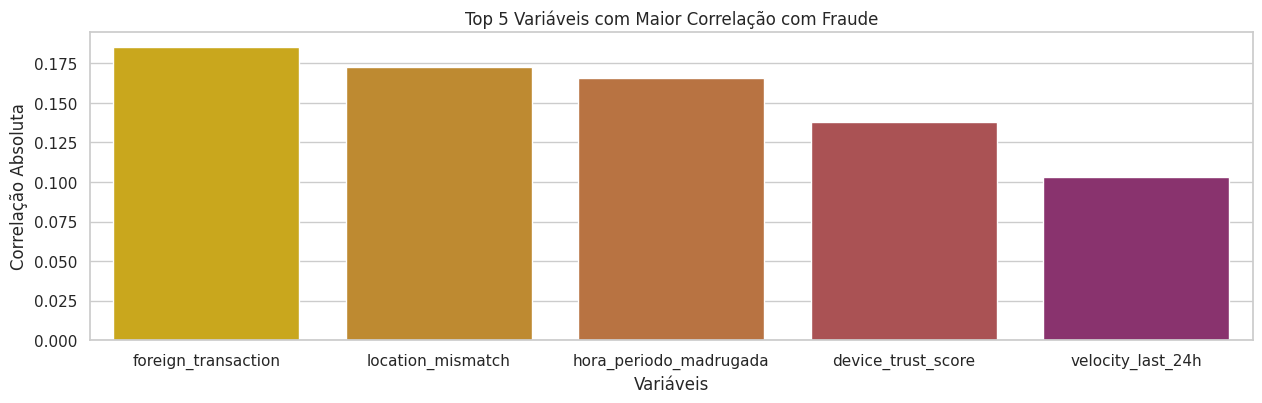

In [ ]:
# Calcular as correlações e selecionar as 5 mais altas (excluindo 'Churn')
top_corr = abs(df_model.corr()['is_fraud']).sort_values(ascending=False)[1:6]

# gráfico de barras
plt.figure(figsize=(15, 4))
sns.barplot(y=top_corr.values, x=top_corr.index, palette=sns.color_palette([
    "#E6B800", "#D69019", "#CC6F2E", "#B84446", "#972573"
]))

# Adicionar título e rótulos
plt.title('Top 5 Variáveis com Maior Correlação com Fraude')
plt.xlabel('Variáveis')
plt.ylabel('Correlação Absoluta')

# Mostrar o gráfico
plt.show()

In [ ]:
# Calcular as correlações e selecionar as 10 menores (excluindo 'Churn')
tail_corr = abs(df_model.corr()['is_fraud']).sort_values(ascending=False)[-10:]

# Exibir os resultados
print(tail_corr)

hora_periodo_tarde               0.059832
hora_periodo_manha               0.052968
hora_periodo_noite               0.051464
amount                           0.028404
merchant_category_Grocery        0.019987
merchant_category_Electronics    0.010481
transaction_id                   0.010155
merchant_category_Food           0.006845
merchant_category_Travel         0.002155
cardholder_age                   0.000590
Name: is_fraud, dtype: float64


Separação da base de treino e teste para aplicação de modelos

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [ ]:
# embaralhar os dados
df_model = df_model.reindex(np.random.permutation(df_model.index))

# separar a classe-alvo das classes independentes
# Separando X e y
X = df_model.drop(['is_fraud', 'transaction_id'], axis=1)
y = df_model['is_fraud']

# verificar tamanho das variáveis
print(f'As variáveis independentes estão em X: {X.shape[0]} registros, { X.shape[1]} atributos')
print(f'A variável alvo "Fraude" está em y: {y.shape[0]} registros.')

As variáveis independentes estão em X: 10000 registros, 14 atributos
A variável alvo "Fraude" está em y: 10000 registros.


In [ ]:
# Separando a base de treino e tese

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    stratify=y, shuffle=True, random_state=42)

# Verificando tamanho dos conjuntos
print(f'O conjunto de treino tem {X_train.shape[0]} registros.')
print(f'O conjunto de testes tem {X_test.shape[0]} registros.')

O conjunto de treino tem 7000 registros.
O conjunto de testes tem 3000 registros.


In [ ]:
# 1. Random Forest com K-Fold (5) + GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline

# Pipeline: StandardScaler + SMOTE + Classificador
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', RandomForestClassifier(random_state=42))
])

param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5],
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(pipe, param_grid, cv=cv, scoring='f1_macro', n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

print("Melhores parâmetros:", grid.best_params_)

y_pred = grid.predict(X_test)

# Define mapping for display purposes
label_mapping = {0: 'Não Fraudulenta', 1: 'Fraudulenta'}

# Convert y_test and y_pred to string labels for classification report and confusion matrix
y_test_display = y_test.map(label_mapping)
y_pred_display = pd.Series(y_pred).map(label_mapping) # Ensure y_pred is a Series for .map()

print(classification_report(y_test_display, y_pred_display))
print("Confusion matrix:\n", confusion_matrix(y_test_display, y_pred_display))

# For ROC-AUC, y_test is already numeric (0/1), so no mapping is needed here.
print("ROC-AUC Score:", roc_auc_score(y_test, grid.predict_proba(X_test)[:,1]))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Melhores parâmetros: {'clf__max_depth': 10, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
                 precision    recall  f1-score   support

    Fraudulenta       0.66      0.82      0.73        45
Não Fraudulenta       1.00      0.99      1.00      2955

       accuracy                           0.99      3000
      macro avg       0.83      0.91      0.86      3000
   weighted avg       0.99      0.99      0.99      3000

Confusion matrix:
 [[  37    8]
 [  19 2936]]
ROC-AUC Score: 0.9931490881744689


In [ ]:
best_rf_model = grid.best_estimator_

In [ ]:
# 2. KNN com K-Fold (5) + GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from imblearn.pipeline import Pipeline

# Pipeline: StandardScaler + SMOTE + Classificador
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', KNeighborsClassifier())
])

param_grid = {
    'clf__n_neighbors': [3, 5, 7],
    'clf__weights': ['uniform', 'distance'],
    'clf__p': [1, 2]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(pipe, param_grid, cv=cv, scoring='f1_macro', n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

print("Melhores parâmetros:", grid.best_params_)

y_pred = grid.predict(X_test)

# Define mapping for display purposes
label_mapping = {0: 'Não Fraudulenta', 1: 'Fraudulenta'}

# Convert y_test and y_pred to string labels for classification report and confusion matrix
y_test_display = y_test.map(label_mapping)
y_pred_display = pd.Series(y_pred).map(label_mapping) # Ensure y_pred is a Series for .map()

print(classification_report(y_test_display, y_pred_display))
print("Confusion matrix:\n", confusion_matrix(y_test_display, y_pred_display))

# For ROC-AUC, y_test is already numeric (0/1), so no mapping is needed here.
print("ROC-AUC Score:", roc_auc_score(y_test, grid.predict_proba(X_test)[:,1]))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Melhores parâmetros: {'clf__n_neighbors': 3, 'clf__p': 2, 'clf__weights': 'uniform'}
                 precision    recall  f1-score   support

    Fraudulenta       0.50      0.73      0.59        45
Não Fraudulenta       1.00      0.99      0.99      2955

       accuracy                           0.98      3000
      macro avg       0.75      0.86      0.79      3000
   weighted avg       0.99      0.98      0.99      3000

Confusion matrix:
 [[  33   12]
 [  33 2922]]
ROC-AUC Score: 0.9055837563451777


In [ ]:
best_knn_model = grid.best_estimator_

In [ ]:
# 3. Decision Tree com K-Fold (5) + GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline

# Pipeline: StandardScaler + SMOTE + Classificador

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', DecisionTreeClassifier(random_state=42))
])

param_grid = {
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5, 10]
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(pipe, param_grid, cv=cv, scoring='f1_macro', n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

print("Melhores parâmetros:", grid.best_params_)

y_pred = grid.predict(X_test)

# Define mapping for display purposes
label_mapping = {0: 'Não Fraudulenta', 1: 'Fraudulenta'}

# Convert y_test and y_pred to string labels for classification report and confusion matrix
y_test_display = y_test.map(label_mapping)
y_pred_display = pd.Series(y_pred).map(label_mapping) # Ensure y_pred is a Series for .map()

print(classification_report(y_test_display, y_pred_display))
print("Confusion matrix:\n", confusion_matrix(y_test_display, y_pred_display))

# For ROC-AUC, y_test is already numeric (0/1), so no mapping is needed here.
print("ROC-AUC Score:", roc_auc_score(y_test, grid.predict_proba(X_test)[:,1]))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Melhores parâmetros: {'clf__max_depth': None, 'clf__min_samples_split': 10}
                 precision    recall  f1-score   support

    Fraudulenta       0.62      0.67      0.65        45
Não Fraudulenta       0.99      0.99      0.99      2955

       accuracy                           0.99      3000
      macro avg       0.81      0.83      0.82      3000
   weighted avg       0.99      0.99      0.99      3000

Confusion matrix:
 [[  30   15]
 [  18 2937]]
ROC-AUC Score: 0.8852453468697122


In [ ]:
best_dt_model = grid.best_estimator_

In [ ]:
# 4. Logistic Regression com K-Fold (5) + GridSearchCV
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline

# Pipeline: StandardScaler + SMOTE + Classificador

from sklearn.linear_model import LogisticRegression
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', LogisticRegression(max_iter=1000))
])

param_grid = {
    'clf__C': [0.1, 1, 10],
    'clf__solver': ['liblinear', 'lbfgs']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(pipe, param_grid, cv=cv, scoring='f1_macro', n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

print("Melhores parâmetros:", grid.best_params_)

y_pred = grid.predict(X_test)

# Define mapping for display purposes
label_mapping = {0: 'Não Fraudulenta', 1: 'Fraudulenta'}

# Convert y_test and y_pred to string labels for classification report and confusion matrix
y_test_display = y_test.map(label_mapping)
y_pred_display = pd.Series(y_pred).map(label_mapping) # Ensure y_pred is a Series for .map()

print(classification_report(y_test_display, y_pred_display))
print("Confusion matrix:\n", confusion_matrix(y_test_display, y_pred_display))

# For ROC-AUC, y_test is already numeric (0/1), so no mapping is needed here.
print("ROC-AUC Score:", roc_auc_score(y_test, grid.predict_proba(X_test)[:,1]))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Melhores parâmetros: {'clf__C': 10, 'clf__solver': 'lbfgs'}
                 precision    recall  f1-score   support

    Fraudulenta       0.38      0.96      0.55        45
Não Fraudulenta       1.00      0.98      0.99      2955

       accuracy                           0.98      3000
      macro avg       0.69      0.97      0.77      3000
   weighted avg       0.99      0.98      0.98      3000

Confusion matrix:
 [[  43    2]
 [  69 2886]]
ROC-AUC Score: 0.996029328821207


In [ ]:
best_lr_model = grid.best_estimator_

In [ ]:
# 5. xgboost com K-Fold (5) + GridSearchCV
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline

# Pipeline: StandardScaler + SMOTE + Classificador

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('clf', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [3, 6, 10],
    'clf__learning_rate': [0.1, 0.3]
}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
grid = GridSearchCV(pipe, param_grid, cv=cv, scoring='f1_macro', n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

print("Melhores parâmetros:", grid.best_params_)

y_pred = grid.predict(X_test)

# Define mapping for display purposes
label_mapping = {0: 'Não Fraudulenta', 1: 'Fraudulenta'}

# Convert y_test and y_pred to string labels for classification report and confusion matrix
y_test_display = y_test.map(label_mapping)
y_pred_display = pd.Series(y_pred).map(label_mapping) # Ensure y_pred is a Series for .map()

print(classification_report(y_test_display, y_pred_display))
print("Confusion matrix:\n", confusion_matrix(y_test_display, y_pred_display))

# For ROC-AUC, y_test is already numeric (0/1), so no mapping is needed here.
print("ROC-AUC Score:", roc_auc_score(y_test, grid.predict_proba(X_test)[:,1]))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Melhores parâmetros: {'clf__learning_rate': 0.3, 'clf__max_depth': 10, 'clf__n_estimators': 200}
                 precision    recall  f1-score   support

    Fraudulenta       0.83      0.87      0.85        45
Não Fraudulenta       1.00      1.00      1.00      2955

       accuracy                           1.00      3000
      macro avg       0.91      0.93      0.92      3000
   weighted avg       1.00      1.00      1.00      3000

Confusion matrix:
 [[  39    6]
 [   8 2947]]
ROC-AUC Score: 0.9976085730400451


In [ ]:
best_xgb_model = grid.best_estimator_

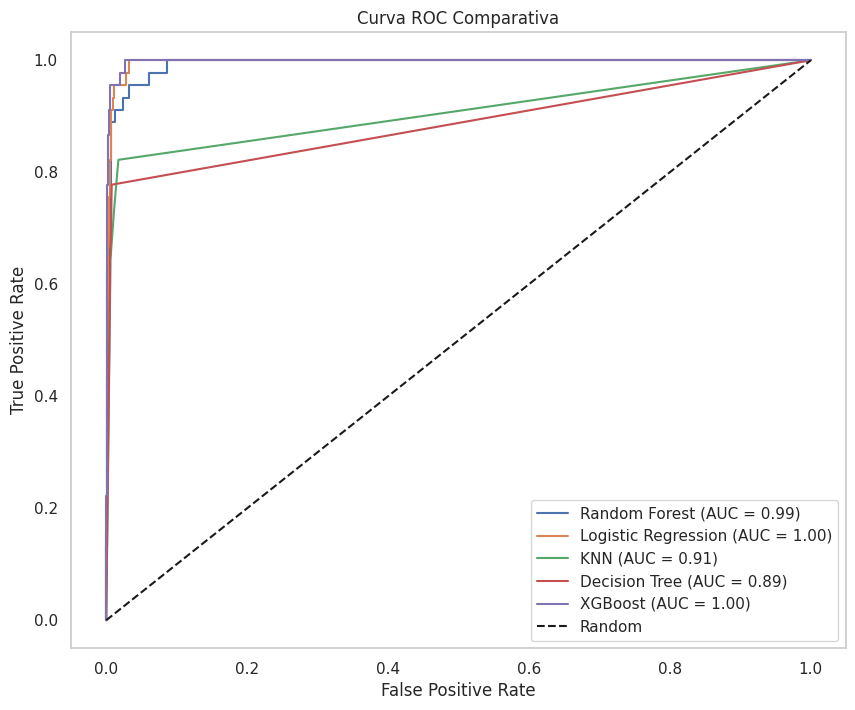

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

modelos = {
    'Random Forest': best_rf_model,        # modelo treinado (grid.best_estimator_)
    'Logistic Regression': best_lr_model,
    'KNN': best_knn_model,
    'Decision Tree': best_dt_model,
    'XGBoost': best_xgb_model
}

plt.figure(figsize=(10, 8))

for nome, modelo in modelos.items():
    # Se usou pipeline/grid, use .predict_proba()
    if hasattr(modelo, "predict_proba"):
        y_score = modelo.predict_proba(X_test)[:, 1]
    else:
        # Some models might have decision_function if not predict_proba (e.g. some SVMs)
        # But for this case, all models have predict_proba through the pipeline.
        y_score = modelo.decision_function(X_test)
    # y_test is already numeric (0s and 1s), so no mapping is needed here.
    fpr, tpr, _ = roc_curve(y_test, y_score)
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{nome} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC Comparativa')
plt.legend(loc='lower right')
plt.grid()
plt.show()

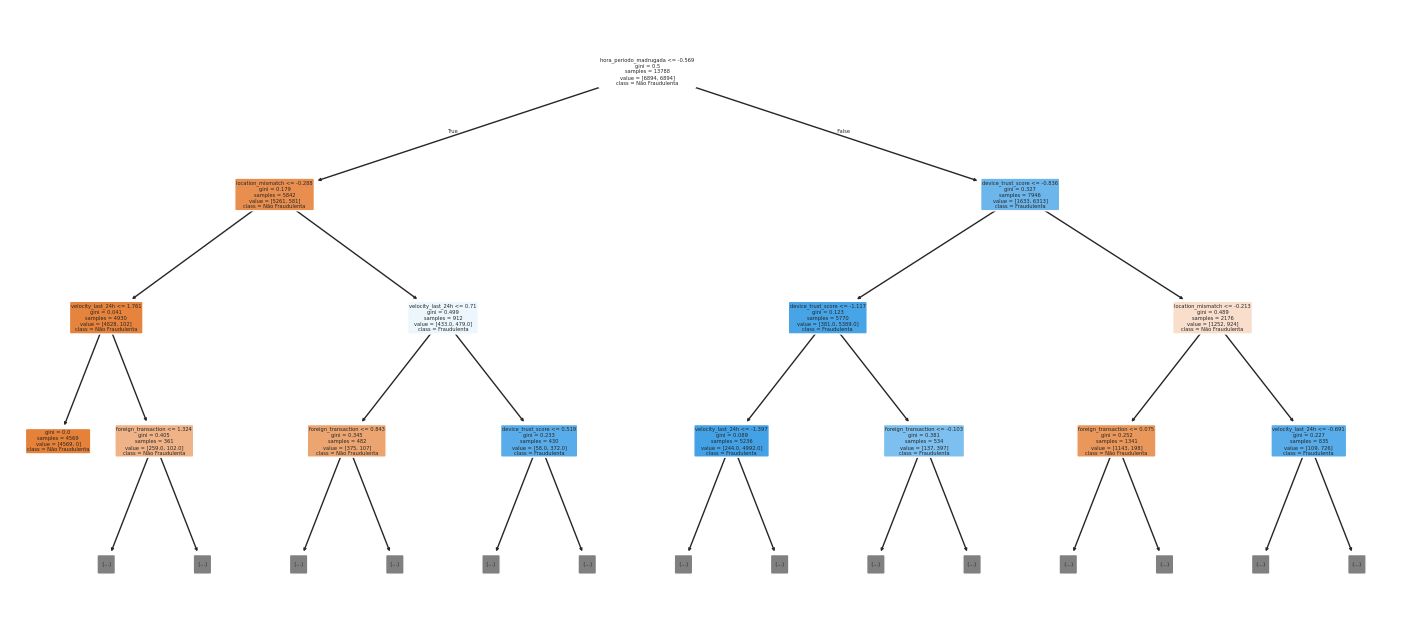

In [ ]:
from sklearn.tree import plot_tree


# Se você usou Pipeline, pega só o classificador:
dt = best_dt_model.named_steps['clf']

plt.figure(figsize=(18, 8))
plot_tree(
    dt,
    feature_names=X_train.columns,  # ou X.columns se treinou com tudo
    class_names=['Não Fraudulenta', 'Fraudulenta'],
    filled=True,
    rounded=True,
    max_depth=3  # Limita a profundidade exibida (opcional)
)
plt.show()